# Handwriting Recognition Using Keras in TensorFlow (Single Layer, Multi-Class)

*For a detailed tutorial of this project, please refer to the book, **"Machine Learning Concepts with Python and the Jupyter Notebook Environment: Using TensorFlow 2.0"***

This project uses the 'MNIST' dataset, which is a set of images of handwritten digits (from 0 to 9). This dataset is pre-divided into 60,000 training images and 10,000 test images, all of size 28x28 pixels. 

Import the TensorFlow Library

In [1]:
import tensorflow as tf

Load the MNIST Dataset

In [4]:
data = tf.keras.datasets.mnist
(ip_train, op_train),(ip_test, op_test) = data.load_data()

Normalize the data to ensure that the pixel values range from 0 to 1.

In [5]:
ip_train, ip_test = ip_train/255.0, ip_test/255.0

Build the Neural Network

In [7]:
# Flatten the input images (make them one-dimensional)
# Add one dense layer
# The number of neurons in the dense layer depends on the number of outputs (classes or labels) and hence we put 10
# We use the softmax activation function



model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), 
    tf.keras.layers.Dense(10, activation = 'softmax')
    ])

Compile the Model

In [10]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

View the Model

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the Model

In [12]:
model.fit(ip_train, op_train, epochs = 6)

Epoch 1/6
1875/1875 [==============================] - 2s 881us/step - loss: 0.4695 - accuracy: 0.8773
Epoch 2/6
1875/1875 [==============================] - 2s 810us/step - loss: 0.3042 - accuracy: 0.9143
Epoch 3/6
1875/1875 [==============================] - 2s 827us/step - loss: 0.2836 - accuracy: 0.9204
Epoch 4/6
1875/1875 [==============================] - 1s 795us/step - loss: 0.2731 - accuracy: 0.9232
Epoch 5/6
1875/1875 [==============================] - 2s 823us/step - loss: 0.2667 - accuracy: 0.9256
Epoch 6/6
1875/1875 [==============================] - 2s 816us/step - loss: 0.2619 - accuracy: 0.9275


Test the Model

In [13]:
model.evaluate(ip_test, op_test)

313/313 [==============================] - 0s 837us/step - loss: 0.2639 - accuracy: 0.9264


[0.2639002799987793, 0.9264000058174133]

Inference

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Call the image to be tested from the dataset - It can be any value between 0 and 9999 because there are 10,000 test images.

test_image = ip_test[9999]

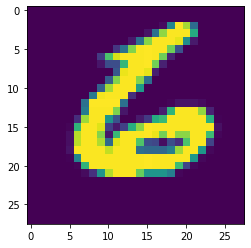

In [16]:
# Plot the image

plt.imshow(test_image.reshape(28,28))

We recognize the image to be the number 6. We now need to check if the model is able to recognize this as well. 

In [18]:
# Import NumPy and the image function under keras

import numpy as np
from tensorflow.keras.preprocessing import image


In [20]:
# Convert the image into a NumPy array

test_image = image.img_to_array(test_image)

In [23]:
# Reshape the test image

test_image = test_image.reshape(1,28,28)

In [24]:
# Call the model to make a prediction, store the value under a variable, and call that variable to display the prediction

result = model.predict(test_image)
result

1/1 [==============================] - 0s 57ms/step


array([[9.6346832e-07, 2.2057748e-14, 3.5324938e-05, 3.7419672e-09,
        2.0508024e-07, 7.6308006e-06, 9.9995589e-01, 1.0307592e-12,
        2.8117238e-08, 7.9961052e-11]], dtype=float32)

In [25]:
# Round off tha array elements

np.around(result)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [26]:
# Find the element that gives the maximum value among all the elements of the array

(np.around(result)).argmax()

6

As you can see, the highest value (the number 1) is located in the 6th position, which shows that the model has correctly predicted that the test image belongs to the 6th class,
that is, the image is that of the number 6.